<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Training%20Neural%20Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 17: Training Neural Networks**
---

### **Description**
In today's lab you'll learn how to train a neural network and you'll experiment with different parameters for fine-tuning deep learning models.



<br>

### **Structure**
**Part 1**: [Review](#p1)

**Part 2**: [The Wine Dataset](#p2)

**Part 3**: [Hyperparameter Tuning](#p3)






<br>

### **Learning Objectives**
By the end of this lab, you will:
* Recognize how to train and evaluate a Neural Network.
* Recognize how to do hyperparameter tuning of learning rate, activation functions, and model architecture (layers and neurons).

<br>


### **Resources**:
* [Deep Learning with keras](https://docs.google.com/document/d/1WCV2ok7dwPWCid5vdOImknCAJS2te5aQ8yRp6J5Clac/edit?usp=sharing)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**

In [ ]:
from keras.models import Sequential
from keras.layers import *
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

from keras.optimizers import Adam, SGD
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<a name="p1"></a>

---
## **Part 1: Review**
---


#### **Problem #1.1**

Create and visualize a new model with three hidden layers.

* The input layer should have `10` neurons

* The first hidden layer should have `6` neurons with no activation.

* The second hidden layer should have `4` neurons with ReLU activation function.

* The third hidden layer should have `12` neurons with ReLU activation.

* The output layer should have `4` neurons.

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(10,)),
    tf.keras.layers.Dense(6, activation=None),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(4)
])
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 6)                 66        
                                                                 
 dense_9 (Dense)             (None, 4)                 28        
                                                                 
 dense_10 (Dense)            (None, 12)                60        
                                                                 
 dense_11 (Dense)            (None, 4)                 52        
                                                                 
Total params: 206 (824.00 Byte)
Trainable params: 206 (824.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Problem #1.2**

Create and visualize a new model with three hidden layers.

* The input layer should have `8` neurons

* The first hidden layer should have `5` neurons with Sigmoid activation.

* The second hidden layer should have `8` neurons with ReLU activation function.

* The third hidden layer should have `7` neurons with no activation.

* The output layer should have `2` neurons.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(8,)),
    tf.keras.layers.Dense(5, activation='sigmoid'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(7, activation=None),
    tf.keras.layers.Dense(2)
])
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 45        
                                                                 
 dense_5 (Dense)             (None, 8)                 48        
                                                                 
 dense_6 (Dense)             (None, 7)                 63        
                                                                 
 dense_7 (Dense)             (None, 2)                 16        
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---

<center>

#### **Wait for Your Instructor to Continue**

---


<a name="p2"></a>

---
## **Part 2: The Breast Cancer Dataset**
---

The Breast Cancer Wisconsin (Diagnostic) dataset is a widely used dataset in machine learning for binary classification tasks. It contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The dataset includes 569 instances, each with 30 numeric, real-valued features. These features describe characteristics of the cell nuclei present in the images, such as texture, radius, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

The target variable in this dataset is binary, indicating whether the breast mass is malignant or benign. This dataset is particularly significant in medical diagnostic research and machine learning due to its real-world implications in breast cancer diagnosis. It's an excellent resource for teaching machine learning techniques, especially in the context of binary classification problems.

**You will use deep learning for classification to predict this variable**:
12. `target` (binary value 0 or 1)



#### **Step #1: Import and and split the data into training/testing**


**This is completed for you. Just run the code below!**

In [ ]:
data = load_breast_cancer()
X = data['data']
y = data['target']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### **Step #2: Determine the dimension of the data**



In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
dimension = X.shape
dimension

(569, 30)

#### **Step #3-6: Building the model**


Build a NN such that it has:
* The correct number of input neurons (one for each feature).
* No hidden layers.
* Two output neurons with the `'linear'` activation function.

Don't forget to visualize the NN.

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
num_input_features = X.shape[1]
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(num_input_features,)),
    tf.keras.layers.Dense(2, activation='linear')
])
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 62        
                                                                 
Total params: 62 (248.00 Byte)
Trainable params: 62 (248.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### **Step #7: Fit the model**

Use the following parameters:

* `mse` loss function
* accuracy metric
* 10 epochs
* 0.1 learning rate

*Most of the code is given to you.*

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
15/15 [==============================] - 1s 20ms/step - loss: 9474.2529 - accuracy: 0.5912 - val_loss: 5415.7056 - val_accuracy: 0.7719
Epoch 2/10
15/15 [==============================] - 0s 5ms/step - loss: 5073.2378 - accuracy: 0.5560 - val_loss: 2783.1309 - val_accuracy: 0.5877
Epoch 3/10
15/15 [==============================] - 0s 4ms/step - loss: 2889.6328 - accuracy: 0.2681 - val_loss: 1531.1888 - val_accuracy: 0.2632
Epoch 4/10
15/15 [==============================] - 0s 5ms/step - loss: 1916.0238 - accuracy: 0.1582 - val_loss: 1198.0659 - val_accuracy: 0.1228
Epoch 5/10
15/15 [==============================] - 0s 4ms/step - loss: 1629.1613 - accuracy: 0.1824 - val_loss: 1123.4020 - val_accuracy: 0.1491
Epoch 6/10
15/15 [==============================] - 0s 5ms/step - loss: 1538.0336 - accuracy: 0.2154 - val_loss: 1101.4825 - val_accuracy: 0.1491
Epoch 7/10
15/15 [==============================] - 0s 5ms/step - loss: 1511.0297 - accuracy: 0.2264 - val_loss: 1099.1656 

#### **Step #8: Evaluate the model**



In [ ]:
print('MSE: ' + str(model.evaluate(X, y)[0]))

18/18 [==============================] - 0s 3ms/step - loss: 1342.2227 - accuracy: 0.2144
MSE: 1342.22265625


<a name="p3"></a>

---
## **Part 3: Hyperparameter Tuning**
---

In this section, we will see how tuning hyperparameters can affect the performance of a Neural Network.

### **Problem #3.1**

Modify the code below to find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model = Sequential([
    Input(30),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Training model with learning rate: 10
Epoch 1/10
8/8 [==============================] - 2s 74ms/step - loss: 19959853056.0000 - mse: 19959853056.0000 - val_loss: 505.9879 - val_mse: 505.9879
Epoch 2/10
8/8 [==============================] - 0s 13ms/step - loss: 860.5072 - mse: 860.5072 - val_loss: 1366.0803 - val_mse: 1366.0803
Epoch 3/10
8/8 [==============================] - 0s 24ms/step - loss: 1592.9575 - mse: 1592.9575 - val_loss: 1890.4374 - val_mse: 1890.4374
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 2011.0984 - mse: 2011.0984 - val_loss: 2164.7100 - val_mse: 2164.7100
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 2223.6233 - mse: 2223.6233 - val_loss: 2297.5093 - val_mse: 2297.5093
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 2324.1160 - mse: 2324.1160 - val_loss: 2357.1660 - val_mse: 2357.1660
Epoch 7/10
8/8 [==============================] - 0s 16ms/step - loss: 2367.6775 - mse: 2367.6775 - val_lo

### **Problem #3.2**

To reach the full potential of smaller learning rates, we often need to compensate by running more epochs. So, modify the code below to increase the `epochs` parameter to `100` and find the ideal `learning_rate` parameter given everything else is fixed. Consider values such as: `10`, `1`, `0.1`, `0.01`, `0.001`, and `0.0001`.

In [ ]:
model = Sequential([
    Input(30),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
learning_rates = [10, 1, 0.1, 0.01, 0.001, 0.0001]
for lr in learning_rates:
    print(f"Training model with learning rate: {lr}")
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Training model with learning rate: 10
Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 20806250496.0000 - mse: 20806250496.0000
Epoch 2/100
8/8 [==============================] - 0s 2ms/step - loss: 951.4104 - mse: 951.4104
Epoch 3/100
8/8 [==============================] - 0s 2ms/step - loss: 1723.8575 - mse: 1723.8575
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 2161.0864 - mse: 2161.0864
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 2382.7896 - mse: 2382.7896
Epoch 6/100
8/8 [==============================] - 0s 2ms/step - loss: 2487.3501 - mse: 2487.3501
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 2532.4480 - mse: 2532.4480
Epoch 8/100
8/8 [==============================] - 0s 2ms/step - loss: 2548.3628 - mse: 2548.3628
Epoch 9/100
8/8 [==============================] - 0s 2ms/step - loss: 2550.1399 - mse: 2550.1399
Epoch 10/100
8/8 [==============================] - 0s 2ms/step - lo

### **Problem #3.3**

The last main hyperparameter for us to consider is `batch_size`, which is how many data points we use to make a single update to the weights and parameters. Modify the code below to find the ideal `batch_size` given everything else is fixed. Consider values such as: `1`, `32`, `64`, `256`, and `len(X_train)`.

<br>

**NOTE**: Each epoch involves looking at *all* of the data points. In other words, **size of training data = batch_size * number of updates per epoch**. So, increasing `batch_size`, decreases the number of updates, which in turn speeds up each epoch. As such, pay attention to the amount of time it takes to run through each epoch.

In [ ]:
model = Sequential([
    Input(30),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
batch_sizes = [1, 32, 64, 256, len(X_train)]
learning_rate = 0.01
epochs = 100
for batch_size in batch_sizes:
    print(f"Training model with batch size: {batch_size}")
    opt = Adam(learning_rate=learning_rate)
    model.compile(optimizer=opt, loss='mse', metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Training model with batch size: 1
Epoch 1/100
455/455 [==============================] - 1s 2ms/step - loss: 1181.8685 - mse: 1181.8685
Epoch 2/100
455/455 [==============================] - 1s 2ms/step - loss: 0.3853 - mse: 0.3853
Epoch 3/100
455/455 [==============================] - 1s 2ms/step - loss: 0.3287 - mse: 0.3287
Epoch 4/100
455/455 [==============================] - 1s 1ms/step - loss: 0.2829 - mse: 0.2829
Epoch 5/100
455/455 [==============================] - 1s 2ms/step - loss: 0.2542 - mse: 0.2542
Epoch 6/100
455/455 [==============================] - 1s 2ms/step - loss: 0.2401 - mse: 0.2401
Epoch 7/100
455/455 [==============================] - 1s 1ms/step - loss: 0.2352 - mse: 0.2352
Epoch 8/100
455/455 [==============================] - 1s 2ms/step - loss: 0.2340 - mse: 0.2340
Epoch 9/100
455/455 [==============================] - 1s 2ms/step - loss: 0.2338 - mse: 0.2338
Epoch 10/100
455/455 [==============================] - 1s 2ms/step - loss: 0.2341 - mse: 0.2341

### **Problem #3.4**

With so many hyperparameters to tune and potentially deep & complex NNs, the amount of information printed out often becomes less helpful to dig through. It is common practice to visualize the performance of different models for each epoch instead. Furthermore, we can "mute" the output of the `fit(...)` function by setting `verbose = False`.

<br>

**Complete the code below to train and visualize the losses of a NN with the best set of hyperparameters you found above.**


Some questions to consider:
* Does the loss tend to increase or decrease?
* Should we have let the model train for more epochs?
* Could we have gotten away with fewer epochs?


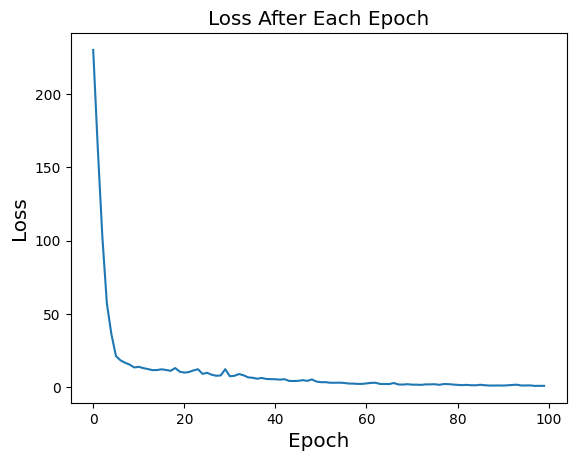

In [ ]:
model = Sequential()
model.add(Input(30))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse', metrics=['mse'])

history = model.fit(X_train, y_train, epochs=100, verbose=False)

loss = history.history['loss']
plt.plot(loss)

plt.title('Loss After Each Epoch', fontsize='x-large')
plt.xlabel('Epoch', fontsize='x-large')
plt.ylabel('Loss', fontsize='x-large')
plt.show()

---
##© 2024 The Coding School, All rights reserved